In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold 
from sklearn import preprocessing


# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP


In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
df['Time ']=Normal_DPx['Time ']
df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,5.931638,0.809176,-1.136223,-0.561535,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.641717,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.617028,5.906167,0.000195
3,5.931638,0.809176,-1.136223,-1.032546,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.543018,5.906167,0.000391
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,0.625223,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,1.088024,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,0.617013,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,0.832983,0.475558,89.843555


In [13]:
Cavdf['Time ']=Cavitation_DPx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,-0.637856,1.664881,1.177414,1.180099,-0.730041,0.000000
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,0.812495,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,0.093187,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.360976,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,0.741663,-0.135096,102.399805


In [14]:
X_train, X_test=train_test_split(df, test_size=0.3, random_state=1)


In [15]:
IF_DP = IsolationForest(random_state=1,contamination=0.05)
IF_DP.fit(X_train)

C:\Users\glowi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=1)

In [16]:
prediction= IF_DP.predict(df)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 94.54%


In [17]:

prediction= IF_DP.predict(Cavdf)
score =0
for f in range (0,Cavdf.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / Cavdf.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 96.46%


In [18]:
df_test=Cavdf

In [19]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['prediction'] = prediction

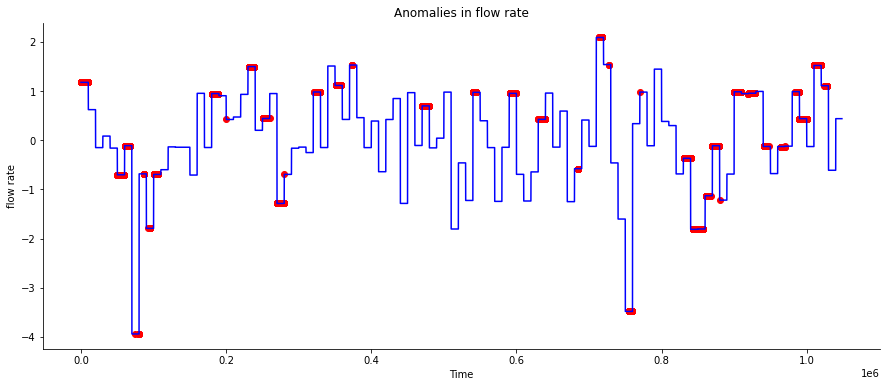

In [20]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

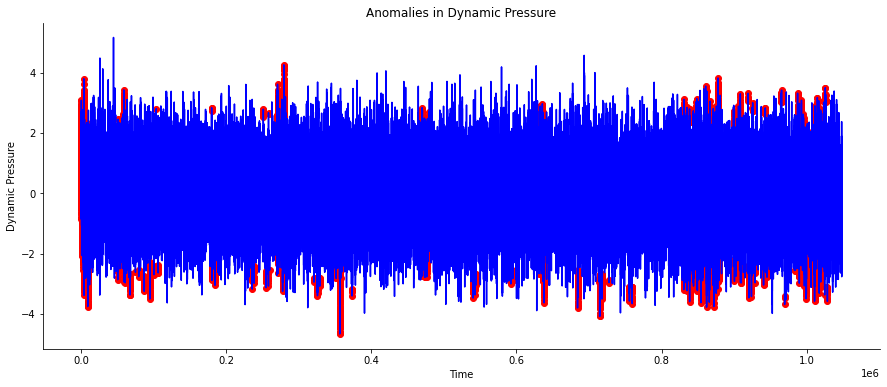

In [21]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Dynamic Pressure']] #anomaly

ax.plot(df_test.index, df_test['Dynamic Pressure'], color='blue')
ax.scatter(a.index, a['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

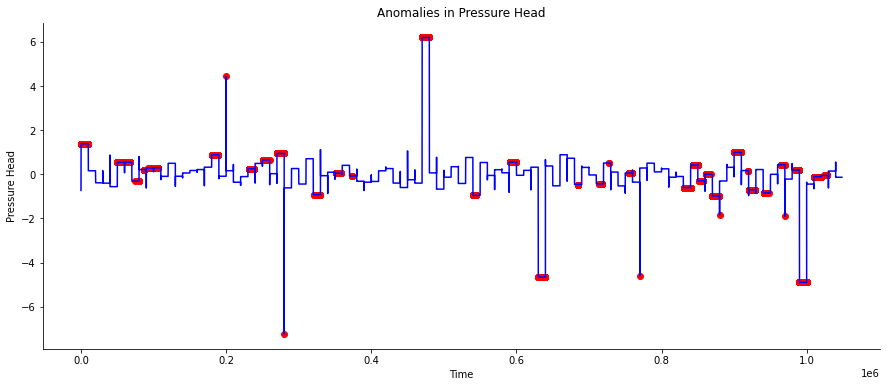

In [22]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['H']] #anomaly

ax.plot(df_test.index, df_test['H'], color='blue')
ax.scatter(a.index, a['H'], color='red')
sb.despine()
plt.title("Anomalies in Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")
plt.show()

In [23]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [24]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,prediction
1,1.465952,1.664881,1.177414,0.788860,1.380058,0.000098,1
2,1.465952,1.664881,1.177414,0.626090,1.380058,0.000195,1
3,1.465952,1.664881,1.177414,1.072405,1.380058,0.000293,1
4,1.465952,1.664881,1.177414,0.198206,1.380058,0.000391,1
5,1.465952,1.664881,1.177414,0.896554,1.380058,0.000488,1
...,...,...,...,...,...,...,...
1028594,-0.111904,-1.095700,1.109368,-3.156925,-0.052825,100.448633,1
1028595,-0.111904,-1.095700,1.109368,-3.117534,-0.052825,100.448730,1
1028597,-0.111904,-1.095700,1.109368,-3.474586,-0.052825,100.448926,1
1028602,-0.111904,-1.095700,1.109368,-3.267221,-0.052825,100.449414,1


# Vibration

In [25]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [26]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [27]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [28]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [29]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [30]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [31]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [32]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [33]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [34]:
df['Time ']=Normal_Vibx['Time ']
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167,0.000000
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167,0.000098
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167,0.000195
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167,0.000293
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167,0.000391
...,...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558,89.843262
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558,89.843359
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558,89.843457
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558,89.843555


In [35]:
Cavdf['Time ']=Cavitation_Vibx['Time ']
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0.000000
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0.000098
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0.000195
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0.000293
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,0.000391
...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,102.399512
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,102.399609
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,102.399707
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,102.399805


In [36]:
X_train, X_test=train_test_split(df, test_size=0.5, random_state=1)


In [37]:
IF_DP = IsolationForest(random_state=1,contamination=0.03)
IF_DP.fit(X_train)

C:\Users\glowi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03, random_state=1)

In [38]:
prediction= IF_DP.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 97.01%


In [39]:

prediction= IF_DP.predict(Cavdf)
score =0
for f in range (0,Cavdf.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / Cavdf.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 97.81%


In [40]:
df_test = pd.DataFrame(Cavdf)
df_test = pd.DataFrame(Cavdf, columns =['Time ', 'P out bar', 'P in bar', 'Q  L/M','Vibration 1','Vibration 2','H'])
df_test

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041
1,0.000098,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058
2,0.000195,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058
3,0.000293,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058
4,0.000391,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058
...,...,...,...,...,...,...,...
1048571,102.399512,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096
1048572,102.399609,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096
1048573,102.399707,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096
1048574,102.399805,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096


In [41]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['prediction'] = prediction

In [42]:
df_test

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,prediction
0,0.000000,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,0
1,0.000098,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,0
2,0.000195,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,0
3,0.000293,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,0
4,0.000391,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,1
...,...,...,...,...,...,...,...,...
1048571,102.399512,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,0
1048572,102.399609,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,0
1048573,102.399707,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,0
1048574,102.399805,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,0


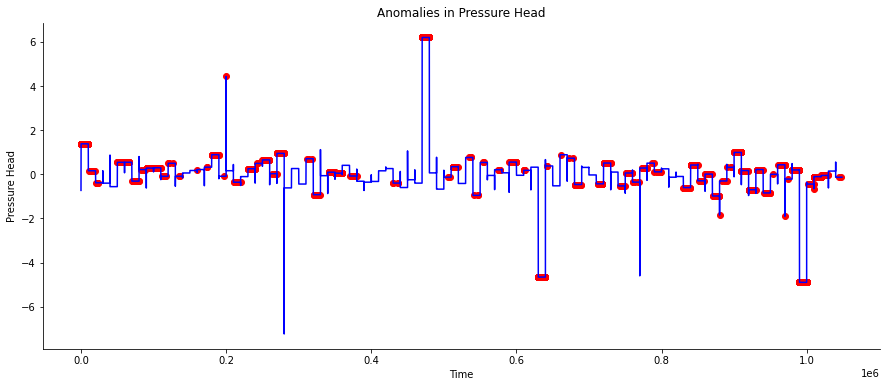

In [43]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['H']] #anomaly

ax.plot(df_test.index, df_test['H'], color='blue')
ax.scatter(a.index, a['H'], color='red')
sb.despine()
plt.title("Anomalies in Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")
plt.show()

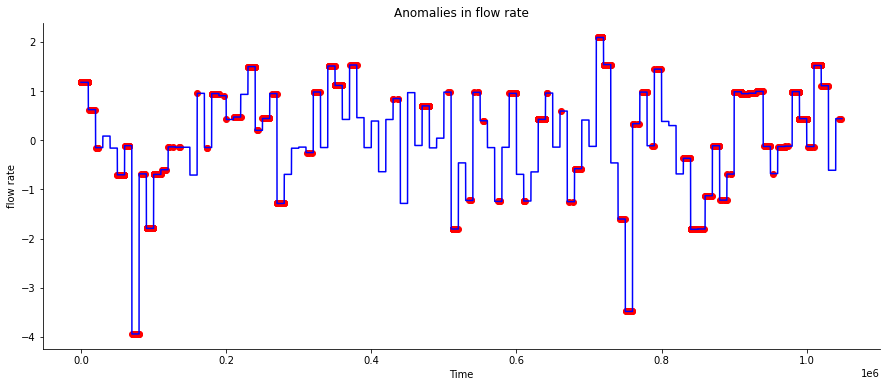

In [44]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

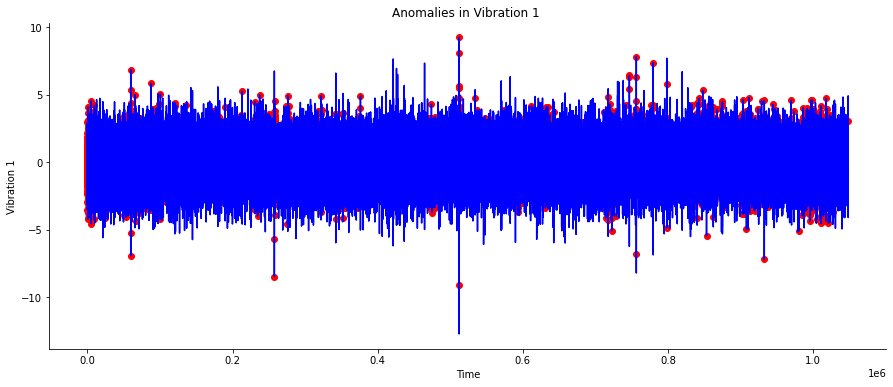

In [45]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 1']] #anomaly

ax.plot(df_test.index, df_test['Vibration 1'], color='blue')
ax.scatter(a.index, a['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1 ")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

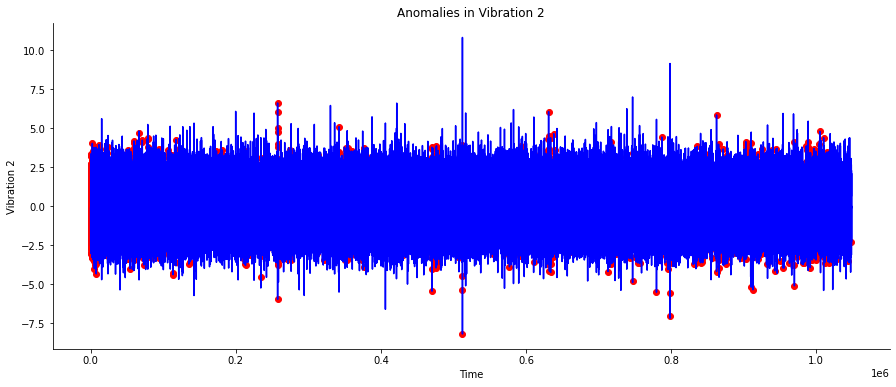

In [46]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 2']] #anomaly

ax.plot(df_test.index, df_test['Vibration 2'], color='blue')
ax.scatter(a.index, a['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

In [47]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [48]:
df_test_ANOMALY

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,prediction
4,0.000391,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,1
5,0.000488,1.465952,1.664881,1.177414,1.448109,-0.057910,1.380058,1
9,0.000879,1.465952,1.664881,1.177414,-1.053049,1.862204,1.380058,1
11,0.001074,1.465952,1.664881,1.177414,-0.917124,-1.328472,1.380058,1
13,0.001270,1.465952,1.664881,1.177414,1.072586,1.753679,1.380058,1
...,...,...,...,...,...,...,...,...
1028586,100.447852,-0.111904,-1.095700,1.109368,1.760468,-3.408498,-0.052825,1
1028930,100.481445,-0.111904,-1.095700,1.109368,-2.862783,-2.837674,-0.052825,1
1029708,100.557422,-0.111904,-1.095700,1.109368,2.875554,2.283664,-0.052825,1
1044081,101.961035,-0.124429,0.189847,0.438994,2.691254,-3.531384,-0.135096,1
